In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import scipy.stats as st

In [3]:
#read in sales and price
history_raw = pd.read_csv("C:/Users/sharo/test_project/Project Test/FinancialRawCleaned.csv")
history_raw.head()

,sedol,ticker_region,proper_name,currency,Market Value200703,Market Value200706,Market Value200709,Market Value200712,Market Value200803,Market Value200806,...,Net Income201606,Net Income201609,Net Income201612,Net Income201703,Net Income201706,Net Income201709,Net Income201712,Net Income201803,Net Income201806,Net Income201809
0,2000019,AMZN-US,"Amazon.com, Inc.",USD,16274.100,28253.300,38657.300,38538.200,29732.100,31238.600,...,857.00,252.000,749.000,724.000,197.000,256.000,1856.000,1629.000,2534.000,2883.000
1,2002305,ABT-US,Abbott Laboratories,USD,85952.100,82759.000,82857.500,87027.500,85112.800,81655.700,...,612.00,-329.000,793.000,417.000,282.000,600.000,-831.000,415.000,729.000,559.000
2,2002479,AES-US,AES Corporation,USD,14354.100,14623.200,13403.300,14338.600,11192.700,12919.600,...,-482.00,170.000,-949.000,-24.000,53.000,152.000,-731.000,684.000,290.000,98.000
3,2003698,ABMD-US,"ABIOMED, Inc.",USD,440.447,349.715,404.137,506.699,430.577,597.859,...,12.91,8.875,15.432,14.899,37.374,24.503,13.446,36.847,90.066,50.127
4,2005973,IBM-US,International Business Machines Corporation,USD,139960.000,143183.000,162323.000,149744.000,158142.000,160589.000,...,2505.00,2853.000,4502.000,1748.000,2331.000,2726.000,-1054.000,1679.000,2403.000,2694.000


In [4]:
#import sector data
sector_raw = pd.read_csv("C:/Users/sharo/test_project/Project Test/company sector.csv")
sector = sector_raw.rename(columns={"Sedol": "sedol"})

In [5]:
#merge 2 datasets
raw = pd.merge(history_raw, sector, on = "sedol", how = "left")
col_list = raw.columns.tolist()
col_list = col_list[-1:] + col_list[:-1]
raw = raw[col_list]
raw.head()

,GICS Sector Name,sedol,ticker_region,proper_name,currency,Market Value200703,Market Value200706,Market Value200709,Market Value200712,Market Value200803,...,Net Income201606,Net Income201609,Net Income201612,Net Income201703,Net Income201706,Net Income201709,Net Income201712,Net Income201803,Net Income201806,Net Income201809
0,Consumer Discretionary,2000019,AMZN-US,"Amazon.com, Inc.",USD,16274.100,28253.300,38657.300,38538.200,29732.100,...,857.00,252.000,749.000,724.000,197.000,256.000,1856.000,1629.000,2534.000,2883.000
1,Health Care,2002305,ABT-US,Abbott Laboratories,USD,85952.100,82759.000,82857.500,87027.500,85112.800,...,612.00,-329.000,793.000,417.000,282.000,600.000,-831.000,415.000,729.000,559.000
2,Utilities,2002479,AES-US,AES Corporation,USD,14354.100,14623.200,13403.300,14338.600,11192.700,...,-482.00,170.000,-949.000,-24.000,53.000,152.000,-731.000,684.000,290.000,98.000
3,Health Care,2003698,ABMD-US,"ABIOMED, Inc.",USD,440.447,349.715,404.137,506.699,430.577,...,12.91,8.875,15.432,14.899,37.374,24.503,13.446,36.847,90.066,50.127
4,Information Technology,2005973,IBM-US,International Business Machines Corporation,USD,139960.000,143183.000,162323.000,149744.000,158142.000,...,2505.00,2853.000,4502.000,1748.000,2331.000,2726.000,-1054.000,1679.000,2403.000,2694.000


## Market Value Growth Rate

In [6]:
#get MV raw data
MV_raw = raw.iloc[:,0:52]
MV_raw_columns = len(MV_raw.columns)
print(f"# columns for MV_raw = {MV_raw_columns}")
MV_raw.head()

# columns for MV_raw = 52


,GICS Sector Name,sedol,ticker_region,proper_name,currency,Market Value200703,Market Value200706,Market Value200709,Market Value200712,Market Value200803,...,Market Value201606,Market Value201609,Market Value201612,Market Value201703,Market Value201706,Market Value201709,Market Value201712,Market Value201803,Market Value201806,Market Value201809
0,Consumer Discretionary,2000019,AMZN-US,"Amazon.com, Inc.",USD,16274.100,28253.300,38657.300,38538.200,29732.100,...,339204.00,397722.00,357688.00,423766.00,464640.00,463371.00,566024.0,701960.00,827803.0,979467.00
1,Health Care,2002305,ABT-US,Abbott Laboratories,USD,85952.100,82759.000,82857.500,87027.500,85112.800,...,57785.50,62264.00,56572.90,77063.40,84457.10,92878.50,99507.4,105051.00,106996.0,128845.00
2,Utilities,2002479,AES-US,AES Corporation,USD,14354.100,14623.200,13403.300,14338.600,11192.700,...,8224.33,8470.41,7659.70,7380.02,7334.73,7277.46,7152.0,7519.71,8871.1,9272.17
3,Health Care,2003698,ABMD-US,"ABIOMED, Inc.",USD,440.447,349.715,404.137,506.699,430.577,...,4700.36,5571.84,4902.46,5467.90,6316.80,7452.25,8297.0,12912.80,18356.6,20256.00
4,Information Technology,2005973,IBM-US,International Business Machines Corporation,USD,139960.000,143183.000,162323.000,149744.000,158142.000,...,145078.00,151043.00,157005.00,163604.00,143360.00,134314.00,141481.0,140844.00,127514.0,137419.00


In [7]:
#get MV growth rate
for i in range(5,len(MV_raw.columns)-4):
    new_column_header = "Market Value Growth" + str(i)
    MV_raw[new_column_header] = MV_raw.iloc[:,i+4]/MV_raw.iloc[:,i] - 1
 
MV_raw.head()

,GICS Sector Name,sedol,ticker_region,proper_name,currency,Market Value200703,Market Value200706,Market Value200709,Market Value200712,Market Value200803,...,Market Value Growth38,Market Value Growth39,Market Value Growth40,Market Value Growth41,Market Value Growth42,Market Value Growth43,Market Value Growth44,Market Value Growth45,Market Value Growth46,Market Value Growth47
0,Consumer Discretionary,2000019,AMZN-US,"Amazon.com, Inc.",USD,16274.100,28253.300,38657.300,38538.200,29732.100,...,0.669689,0.656650,0.123590,0.512381,0.369795,0.165063,0.582452,0.656480,0.781601,1.113786
1,Health Care,2002305,ABT-US,Abbott Laboratories,USD,85952.100,82759.000,82857.500,87027.500,85112.800,...,-0.210051,0.037785,-0.144616,0.253989,0.461562,0.491689,0.758923,0.363176,0.266868,0.387242
2,Utilities,2002479,AES-US,AES Corporation,USD,14354.100,14623.200,13403.300,14338.600,11192.700,...,-0.091372,0.282818,0.200324,-0.050944,-0.108167,-0.140837,-0.066282,0.018928,0.209465,0.274094
3,Health Care,2003698,ABMD-US,"ABIOMED, Inc.",USD,440.447,349.715,404.137,506.699,430.577,...,0.701870,0.416099,0.279601,0.353927,0.343897,0.337485,0.692416,1.361565,1.905997,1.718105
4,Information Technology,2005973,IBM-US,International Business Machines Corporation,USD,139960.000,143183.000,162323.000,149744.000,158142.000,...,-0.089450,0.073992,0.181341,0.125308,-0.011842,-0.110757,-0.098876,-0.139116,-0.110533,0.023117


In [8]:
#MV Growth only
MV_growth_raw = MV_raw.drop(MV_raw.iloc[:,5:MV_raw_columns],axis = 1)
MV_growth_raw

,GICS Sector Name,sedol,ticker_region,proper_name,currency,Market Value Growth5,Market Value Growth6,Market Value Growth7,Market Value Growth8,Market Value Growth9,...,Market Value Growth38,Market Value Growth39,Market Value Growth40,Market Value Growth41,Market Value Growth42,Market Value Growth43,Market Value Growth44,Market Value Growth45,Market Value Growth46,Market Value Growth47
0,Consumer Discretionary,2000019,AMZN-US,"Amazon.com, Inc.",USD,0.826958,0.105662,-0.192546,-0.430492,0.059656,...,0.669689,0.656650,0.123590,0.512381,0.369795,0.165063,0.582452,0.656480,0.781601,1.113786
1,Health Care,2002305,ABT-US,Abbott Laboratories,USD,-0.009765,-0.013331,0.078238,-0.047964,-0.133874,...,-0.210051,0.037785,-0.144616,0.253989,0.461562,0.491689,0.758923,0.363176,0.266868,0.387242
2,Utilities,2002479,AES-US,AES Corporation,USD,-0.220244,-0.116500,-0.422477,-0.619115,-0.654080,...,-0.091372,0.282818,0.200324,-0.050944,-0.108167,-0.140837,-0.066282,0.018928,0.209465,0.274094
3,Health Care,2003698,ABMD-US,"ABIOMED, Inc.",USD,-0.022409,0.709561,0.608056,0.188856,-0.582511,...,0.701870,0.416099,0.279601,0.353927,0.343897,0.337485,0.692416,1.361565,1.905997,1.718105
4,Information Technology,2005973,IBM-US,International Business Machines Corporation,USD,0.129909,0.121565,-0.031986,-0.247396,-0.190411,...,-0.089450,0.073992,0.181341,0.125308,-0.011842,-0.110757,-0.098876,-0.139116,-0.110533,0.023117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Consumer Discretionary,BZ12TX5,ATGE-US,Adtalem Global Education Inc.,USD,0.434565,0.581578,0.345824,0.119955,0.155550,...,-0.414985,-0.163780,0.222817,1.043196,1.121197,0.516623,0.294489,0.293151,0.217099,0.298918
378,Materials,BZ12WP8,LIN-US,Linde plc,USD,0.314385,0.289138,-0.163877,-0.349151,-0.215528,...,-0.063960,0.188500,0.144521,0.036583,0.182652,0.160212,0.328602,0.225287,0.199607,0.156438
379,NaN,BZ19F83,WINMQ-US,"Windstream Holdings, Inc.",USD,-0.237651,-0.230154,-0.286435,-0.316871,-0.339094,...,0.345505,0.557398,0.133491,0.403059,-0.171575,-0.664805,-0.521171,-0.721989,-0.696032,-0.350669
380,Real Estate,BZ6TS23,SBAC-US,SBA Communications Corp. Class A,USD,0.066147,0.095095,-0.209624,-0.477037,-0.145590,...,-0.087957,0.055176,-0.054262,0.160915,0.213793,0.223682,0.522429,0.363932,0.161811,0.075699


In [9]:
MV_grows_by_cate = MV_growth_raw.groupby(["GICS Sector Name"]).mean()
MV_grows_by_cate

,Market Value Growth5,Market Value Growth6,Market Value Growth7,Market Value Growth8,Market Value Growth9,Market Value Growth10,Market Value Growth11,Market Value Growth12,Market Value Growth13,Market Value Growth14,...,Market Value Growth38,Market Value Growth39,Market Value Growth40,Market Value Growth41,Market Value Growth42,Market Value Growth43,Market Value Growth44,Market Value Growth45,Market Value Growth46,Market Value Growth47
GICS Sector Name,,,,,,,,,,,,,,,,,,,,,
@NA,-0.100327,-0.050917,-0.490996,-0.580461,-0.529237,-0.513402,0.021472,0.651221,0.439078,-0.172927,...,-0.097777,-0.110034,0.412065,0.312103,0.013475,0.289580,-0.244293,-0.479484,-0.260005,-0.412436
Communication Services,-0.127947,-0.160709,-0.208802,-0.460708,-0.390170,-0.258012,0.112551,0.757657,1.679729,0.694740,...,0.035172,0.131535,0.082713,0.213548,0.199913,0.174866,0.183917,0.120058,0.187121,0.257810
Consumer Discretionary,0.052746,-0.207985,-0.252897,-0.422956,-0.417234,-0.070425,0.205620,0.950927,1.777277,0.445593,...,-0.005250,0.149739,0.026546,0.098331,0.172973,0.085169,0.176861,0.055111,-0.023815,-0.032022
Consumer Staples,-0.103864,-0.183151,-0.131063,-0.289675,-0.262836,-0.112734,-0.097195,0.179909,0.499926,0.242186,...,0.164751,0.117189,-0.041951,0.026653,-0.005598,0.019702,0.191480,0.042157,-0.029317,0.021213
Energy,0.354814,0.529612,-0.041251,-0.430160,-0.471135,-0.492969,-0.101820,0.499557,0.633180,0.206484,...,-0.146546,0.242826,0.473204,0.285358,-0.049472,-0.048682,-0.043932,-0.040261,0.382966,0.304210
Financials,-0.151127,-0.279122,-0.227766,-0.416030,-0.501624,-0.253089,-0.111428,0.357265,1.517860,0.420033,...,-0.084844,0.089801,0.222032,0.317892,0.375700,0.288623,0.172159,0.137848,0.059898,0.031913
Health Care,-0.030673,-0.067126,-0.091592,-0.258493,-0.240501,-0.102799,0.016449,0.438335,0.831022,0.301109,...,0.004950,0.161651,-0.028534,0.143939,0.188398,0.166545,0.343766,0.240196,0.189368,0.298181
Industrials,-0.012849,-0.085183,-0.188595,-0.325031,-0.415767,-0.285386,-0.048112,0.581530,1.050816,0.437862,...,-0.055453,0.136594,0.180934,0.155654,0.214565,0.184295,0.190033,0.123792,0.045395,0.088014
Information Technology,0.051161,-0.020185,-0.205211,-0.426785,-0.360096,-0.284592,0.037324,0.684923,0.886290,0.337901,...,0.004909,0.111136,0.134623,0.171559,0.227775,0.236406,0.238201,0.234911,0.212782,0.245325


## Sales Growth Rate

In [10]:
#get sales raw data
sales_raw = raw.drop(columns = raw.iloc[:,5:52].columns.tolist()).iloc[:,0:52]
sales_raw_columns = len(sales_raw.columns)
print(f"# columns for sales_raw = {sales_raw_columns}")
sales_raw

# columns for sales_raw = 52


,GICS Sector Name,sedol,ticker_region,proper_name,currency,Sales200703,Sales200706,Sales200709,Sales200712,Sales200803,...,Sales201606,Sales201609,Sales201612,Sales201703,Sales201706,Sales201709,Sales201712,Sales201803,Sales201806,Sales201809
0,Consumer Discretionary,2000019,AMZN-US,"Amazon.com, Inc.",USD,3015.000,2886.000,3262.000,5672.000,4135.000,...,30404.000,32714.000,43741.000,35714.000,37955.000,43744.000,60453.000,51042.000,52886.000,56576.000
1,Health Care,2002305,ABT-US,Abbott Laboratories,USD,5290.284,6370.620,6376.706,7221.351,6765.603,...,5333.000,5302.000,5333.000,6335.000,6637.000,6829.000,7589.000,7390.000,7767.000,7656.000
2,Utilities,2002479,AES-US,AES Corporation,USD,3109.000,3344.000,3471.000,3664.000,4104.000,...,3197.000,3522.000,3527.000,3482.000,3470.000,3620.000,2640.000,2744.000,2538.000,2838.000
3,Health Care,2003698,ABMD-US,"ABIOMED, Inc.",USD,13.851,14.063,11.355,16.015,17.507,...,102.995,102.955,114.674,124.680,132.468,132.823,154.022,174.436,180.010,181.778
4,Information Technology,2005973,IBM-US,International Business Machines Corporation,USD,22029.000,23772.000,24119.000,28866.000,24502.000,...,20238.000,19226.000,21770.000,18155.000,19289.000,19153.000,22543.000,19072.000,20003.000,18756.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Consumer Discretionary,BZ12TX5,ATGE-US,Adtalem Global Education Inc.,USD,245.825,232.829,250.318,273.737,290.973,...,471.700,449.892,456.350,452.089,451.469,421.025,337.244,342.193,319.787,284.190
378,Materials,BZ12WP8,LIN-US,Linde plc,USD,2175.000,2332.000,2372.000,2523.000,2663.000,...,2665.000,2716.000,2644.000,2728.000,2834.000,2922.000,2953.000,2999.000,3061.000,3024.000
379,NaN,BZ19F83,WINMQ-US,"Windstream Holdings, Inc.",USD,783.700,826.700,822.600,827.800,811.700,...,1359.600,1344.900,1309.100,1365.700,1491.600,1497.700,1497.900,1454.300,1444.400,1420.600
380,Real Estate,BZ6TS23,SBAC-US,SBA Communications Corp. Class A,USD,95.808,100.289,103.201,108.903,109.917,...,405.532,411.319,416.505,423.363,427.294,433.945,443.073,458.302,456.323,467.221


In [11]:
for i in range(5,len(sales_raw.columns)-4):
    new_column_header = "Sales Growth" + str(i)
    sales_raw[new_column_header] = sales_raw.iloc[:,i+4]/sales_raw.iloc[:,i] - 1
 
sales_raw.head()

,GICS Sector Name,sedol,ticker_region,proper_name,currency,Sales200703,Sales200706,Sales200709,Sales200712,Sales200803,...,Sales Growth38,Sales Growth39,Sales Growth40,Sales Growth41,Sales Growth42,Sales Growth43,Sales Growth44,Sales Growth45,Sales Growth46,Sales Growth47
0,Consumer Discretionary,2000019,AMZN-US,"Amazon.com, Inc.",USD,3015.000,2886.000,3262.000,5672.000,4135.000,...,0.311365,0.290086,0.223627,0.226105,0.248355,0.337165,0.382067,0.429187,0.393387,0.293343
1,Health Care,2002305,ABT-US,Abbott Laboratories,USD,5290.284,6370.620,6376.706,7221.351,6765.603,...,0.031528,0.029515,0.027949,0.296827,0.244515,0.288005,0.423026,0.166535,0.170258,0.121101
2,Utilities,2002479,AES-US,AES Corporation,USD,3109.000,3344.000,3471.000,3664.000,4104.000,...,-0.168963,-0.050930,0.041642,0.015456,0.085393,0.027825,-0.251489,-0.211947,-0.268588,-0.216022
3,Health Care,2003698,ABMD-US,"ABIOMED, Inc.",USD,13.851,14.063,11.355,16.015,17.507,...,0.402590,0.348302,0.336605,0.326990,0.286160,0.290107,0.343129,0.399070,0.358894,0.368573
4,Information Technology,2005973,IBM-US,International Business Machines Corporation,USD,22029.000,23772.000,24119.000,28866.000,24502.000,...,-0.027627,-0.002801,-0.013101,-0.028313,-0.046892,-0.003797,0.035508,0.050510,0.037016,-0.020728


In [12]:
sales_growth_raw = sales_raw.drop(sales_raw.iloc[:,5:sales_raw_columns],axis = 1)
sales_growth_raw

,GICS Sector Name,sedol,ticker_region,proper_name,currency,Sales Growth5,Sales Growth6,Sales Growth7,Sales Growth8,Sales Growth9,...,Sales Growth38,Sales Growth39,Sales Growth40,Sales Growth41,Sales Growth42,Sales Growth43,Sales Growth44,Sales Growth45,Sales Growth46,Sales Growth47
0,Consumer Discretionary,2000019,AMZN-US,"Amazon.com, Inc.",USD,0.371476,0.407831,0.307174,0.181770,0.182346,...,0.311365,0.290086,0.223627,0.226105,0.248355,0.337165,0.382067,0.429187,0.393387,0.293343
1,Health Care,2002305,ABT-US,Abbott Laboratories,USD,0.278873,0.148086,0.175789,0.100939,-0.006982,...,0.031528,0.029515,0.027949,0.296827,0.244515,0.288005,0.423026,0.166535,0.170258,0.121101
2,Utilities,2002479,AES-US,AES Corporation,USD,0.320039,0.239833,0.251801,-0.051583,-0.182992,...,-0.168963,-0.050930,0.041642,0.015456,0.085393,0.027825,-0.251489,-0.211947,-0.268588,-0.216022
3,Health Care,2003698,ABMD-US,"ABIOMED, Inc.",USD,0.263952,0.163123,0.761251,0.078426,0.118581,...,0.402590,0.348302,0.336605,0.326990,0.286160,0.290107,0.343129,0.399070,0.358894,0.368573
4,Information Technology,2005973,IBM-US,International Business Machines Corporation,USD,0.112261,0.128218,0.049048,-0.064401,-0.113909,...,-0.027627,-0.002801,-0.013101,-0.028313,-0.046892,-0.003797,0.035508,0.050510,0.037016,-0.020728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Consumer Discretionary,BZ12TX5,ATGE-US,Adtalem Global Education Inc.,USD,0.183659,0.188877,0.213325,0.350256,0.346799,...,-0.003147,0.019209,0.000322,-0.046670,-0.042890,-0.064164,-0.260997,-0.243085,-0.291675,-0.325004
378,Materials,BZ12WP8,LIN-US,Linde plc,USD,0.224368,0.234134,0.202361,-0.047562,-0.202779,...,-0.026662,0.011169,0.018882,0.087286,0.063415,0.075847,0.116868,0.099340,0.080099,0.034908
379,NaN,BZ19F83,WINMQ-US,"Windstream Holdings, Inc.",USD,0.035728,-0.032418,-0.034646,-0.060763,-0.069853,...,-0.043276,-0.102562,-0.082621,-0.005607,0.097087,0.113614,0.144221,0.064875,-0.031644,-0.051479
380,Real Estate,BZ6TS23,SBAC-US,SBA Communications Corp. Class A,USD,0.147263,0.116294,0.149756,0.234392,0.228654,...,-0.012593,0.001422,0.023502,0.059019,0.053663,0.055008,0.063788,0.082527,0.067937,0.076683


In [13]:
sales_grows_by_cate = sales_growth_raw.groupby(["GICS Sector Name"]).mean()
sales_grows_by_cate

,Sales Growth5,Sales Growth6,Sales Growth7,Sales Growth8,Sales Growth9,Sales Growth10,Sales Growth11,Sales Growth12,Sales Growth13,Sales Growth14,...,Sales Growth38,Sales Growth39,Sales Growth40,Sales Growth41,Sales Growth42,Sales Growth43,Sales Growth44,Sales Growth45,Sales Growth46,Sales Growth47
GICS Sector Name,,,,,,,,,,,,,,,,,,,,,
@NA,0.108898,0.041403,-0.120161,-0.020800,-0.125216,0.030589,1.569980,0.023048,1.014894,0.487552,...,-0.151795,-0.122329,0.060935,-0.015816,0.015179,0.130773,-0.080294,-0.003274,0.026363,-0.080973
Communication Services,0.182636,0.146432,0.281652,0.177925,0.110760,0.122344,0.093802,0.105829,0.224708,0.201986,...,0.103659,0.106095,0.075814,0.051450,0.058824,0.034974,0.116556,0.192757,0.193799,0.233846
Consumer Discretionary,0.120116,0.122146,0.096646,-0.009642,-0.101970,-0.100004,-0.034180,0.116919,0.195043,0.244005,...,0.098712,0.130388,0.116103,0.121751,0.061687,0.041554,0.053649,0.076914,0.038705,0.024236
Consumer Staples,0.063276,0.062983,0.042455,-0.073554,-0.024066,-0.039317,-0.018128,0.074645,0.074286,0.103438,...,-0.012072,-0.001234,0.017878,0.024090,0.025613,0.044683,0.040237,0.070066,0.037352,0.022755
Energy,0.412420,0.524833,0.501822,-0.051139,-0.288570,-0.407626,-0.381674,0.028993,0.354300,0.313642,...,-0.235463,-0.129670,0.048740,0.367090,0.220620,0.180780,0.209350,0.199598,0.220655,0.272853
Financials,0.074617,-0.004388,-0.094666,0.001772,-0.067267,-0.485368,0.397665,0.105269,0.078516,-0.010710,...,0.050903,0.167677,0.065504,0.100085,0.063401,0.070321,0.017155,0.085566,0.071944,0.085355
Health Care,0.288632,0.253044,0.177509,0.031063,0.005702,0.036315,0.053723,0.285493,0.787431,1.643915,...,0.201759,0.129309,0.109442,0.106155,0.075134,0.159660,0.130138,0.087082,0.826843,0.065148
Industrials,0.100709,0.137149,0.119292,-0.013145,-0.100932,-0.160084,-0.140624,-0.057399,0.046210,0.115927,...,-0.019536,0.035335,0.023511,0.071502,0.086080,0.076468,0.114510,0.105718,0.098730,0.075505
Information Technology,0.180961,0.179146,0.094182,-0.028031,-0.105358,-0.108761,-0.061165,0.132523,0.294631,0.309444,...,0.076707,0.088058,0.077002,0.110261,0.066955,0.099843,0.086917,0.090823,0.065880,0.039439


## Aggregate Plot for sales growth rate vs MV growth rate

The correlation between both factors is 0.08


,Sales Growth,MV Growth
0,0.371476,0.826958
1,0.278873,-0.009765
2,0.320039,-0.220244
3,0.263952,-0.022409
4,0.112261,0.129909
...,...,...
16421,-0.325004,0.298918
16422,0.034908,0.156438
16423,-0.051479,-0.350669
16424,0.076683,0.075699


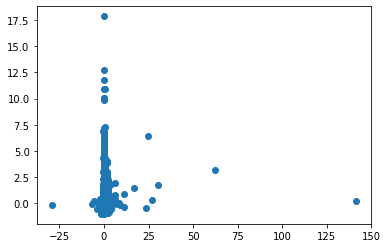

In [14]:
#scatter plot -- sales growth vs MV growth (all data)
sales_growth_table = sales_growth_raw.iloc[:,5:len(sales_growth_raw)]
sales_growth_series = pd.Series(sales_growth_table.values.ravel('F'))
sales_growth_df = sales_growth_series.to_frame()
sales_growth_df.columns = ["Sales Growth"]

MV_growth_table = MV_growth_raw.iloc[:,5:len(MV_growth_raw)]
MV_growth_series = pd.Series(MV_growth_table.values.ravel('F'))
MV_growth_df = MV_growth_series.to_frame()
MV_growth_df.columns = ["MV Growth"]

scatter_pair = pd.merge(sales_growth_df, MV_growth_df, left_index = True, right_index = True, how = "outer")
scatter_pair

plt.scatter(scatter_pair["Sales Growth"], scatter_pair["MV Growth"])
correlation = st.pearsonr(scatter_pair["Sales Growth"],scatter_pair["MV Growth"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
scatter_pair

Confirm whether below is reasonable - remove outlier -- based on independent variable

The correlation between both factors is 0.17


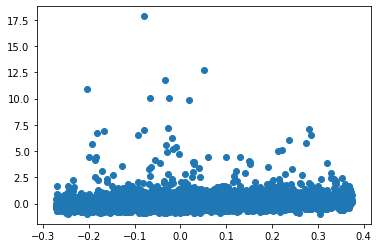

In [16]:
#scatter Plot -- 
#remove outlier (sales growth) for independent variable
quartiles = scatter_pair["Sales Growth"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
scatter_pair["Outlier"] = np.where((scatter_pair["Sales Growth"]<lower_bound) | (scatter_pair["Sales Growth"]>upper_bound), 'yes', 'no')

scatter_raw = scatter_pair[scatter_pair["Outlier"] != "yes"]
scatter_raw

plt.scatter(scatter_raw["Sales Growth"], scatter_raw["MV Growth"])
correlation = st.pearsonr(scatter_raw["Sales Growth"],scatter_raw["MV Growth"])
print(f"The correlation between both factors is {round(correlation[0],2)}")


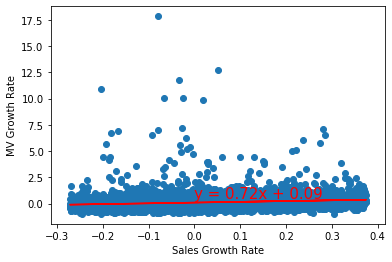

The correlation between both factors is 0.17


In [15]:
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(scatter_raw["Sales Growth"], scatter_raw["MV Growth"])
regress_values = scatter_raw["Sales Growth"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(scatter_raw["Sales Growth"],scatter_raw["MV Growth"])
plt.plot(scatter_raw["Sales Growth"],regress_values,"r-")
plt.annotate(line_eq,(0,0.5),fontsize=15,color="red")
plt.xlabel('Sales Growth Rate')
plt.ylabel('MV Growth Rate')
plt.show()
correlation = st.pearsonr(scatter_raw["Sales Growth"],scatter_raw["MV Growth"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

## T-test - Independent ttest on Sales Growth vs Market Value Growth

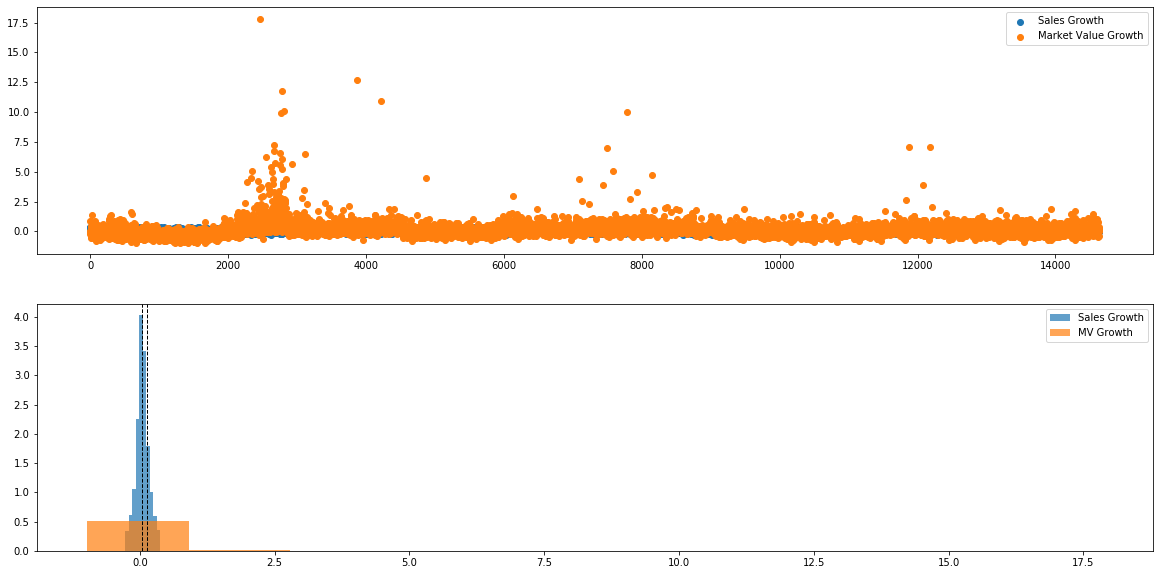

In [17]:
# Scatter Plot of Data
plt.figure(figsize = (20,10))
plt.subplot(2, 1, 1)
plt.scatter(range(len(scatter_raw["Sales Growth"])), scatter_raw["Sales Growth"], label="Sales Growth")
plt.scatter(range(len(scatter_raw["MV Growth"])), scatter_raw["MV Growth"], label="Market Value Growth")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(scatter_raw["Sales Growth"], 10, density=True, alpha=0.7, label="Sales Growth")
plt.hist(scatter_raw["MV Growth"], 10, density=True, alpha=0.7, label="MV Growth")
plt.axvline(scatter_raw["Sales Growth"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(scatter_raw["MV Growth"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [18]:
st.ttest_ind(scatter_raw["Sales Growth"], scatter_raw["MV Growth"], equal_var=False)

Ttest_indResult(statistic=-18.401931529828122, pvalue=7.315456367172856e-75)